<a href="https://colab.research.google.com/github/irina-lebedeva/Pytorch-Review/blob/main/Pytorch_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

transform  = transforms.Compose([transforms.ToTensor()])
traindata = torchvision.datasets.MNIST(root = './data', train = True, download = True, transform = transform)
testdata = torchvision.datasets.MNIST(root = './data', train = False, download = True, transform = transform)
trainloader = torch.utils.data.DataLoader(traindata, batch_size = 64, shuffle = True)
testloader = torch.utils.data.DataLoader(testdata, batch_size = 64, shuffle = False)
classes = tuple(str(i) for i in range(10))

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:62: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


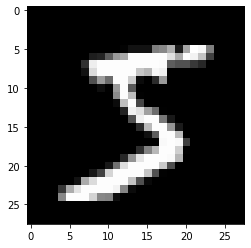

In [ ]:
plt.imshow(trainloader.dataset.train_data[0], cmap = 'gray')

In [ ]:
import torch.nn as nn
import torch.nn.functional as F


class SimpleConvNet(nn.Module):
    def __init__(self):
        super(SimpleConvNet, self).__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 6, kernel_size=5)
        self.pool = nn.MaxPool2d(kernel_size = 2, stride=2)
        self.conv2 = nn.Conv2d(in_channels = 6, out_channels = 16, kernel_size=5)
        self.fc1 = nn.Linear(4*4*16, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 4*4*16)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        return x

In [ ]:
from tqdm import tqdm_notebook

In [ ]:
net = SimpleConvNet()
#print(next(iter(trainloader)))
#net.forward(next(iter(trainloader)))

for X in trainloader:
    break
#print(X)
net.forward(X[0])


tensor([[0.0000, 0.0436, 0.0062, 0.0804, 0.0365, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0521, 0.0167, 0.0795, 0.0309, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0538, 0.0116, 0.0796, 0.0342, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0581, 0.0121, 0.0885, 0.0344, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000]], grad_fn=<ReluBackward0>)

In [ ]:
net  = SimpleConvNet()

loss_fn = torch.nn.CrossEntropyLoss()
learning_rate  = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr = learning_rate)
losses = []

for epoch in tqdm_notebook(range(3)):
    running_loss = 0.0

    for i, batch in enumerate(tqdm_notebook(trainloader)):
        x_batch, y_batch = batch
        optimizer.zero_grad()
        y_pred = net(x_batch)
        loss = loss_fn (y_pred, y_batch)
        loss.backward()
        optimizer.step()




/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


  0%|          | 0/3 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:11: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  # This is added back by InteractiveShellApp.init_path()


  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

  0%|          | 0/15000 [00:00<?, ?it/s]

In [ ]:
classes_correct = list(0. for i in range(10))
classes_total = list(0. for i in range(10))
with torch.no_grad():
    for data in testloader:
        images, labels = data
        y_pred = net(images)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == labels).squeeze()
        for i in range(4):
            label = labels[i]
            classes_correct[label] += c[i].item()
            classes_total [label] += 1
for i in range(10):
    print(classes[i], 100*classes_correct[i]/classes_total[i])


0 99.6938775510204
1 99.8237885462555
2 98.25581395348837
3 98.01980198019803
4 98.77800407331975
5 98.87892376681614
6 0.0
7 98.34630350194553
8 0.0
9 0.0
